# Projet P7 - Implémentez un modèle de scoring
*OPENCLASSROOMS - Parcours Data Scientist - Adeline Le Ray - 10/2024*
<hr>

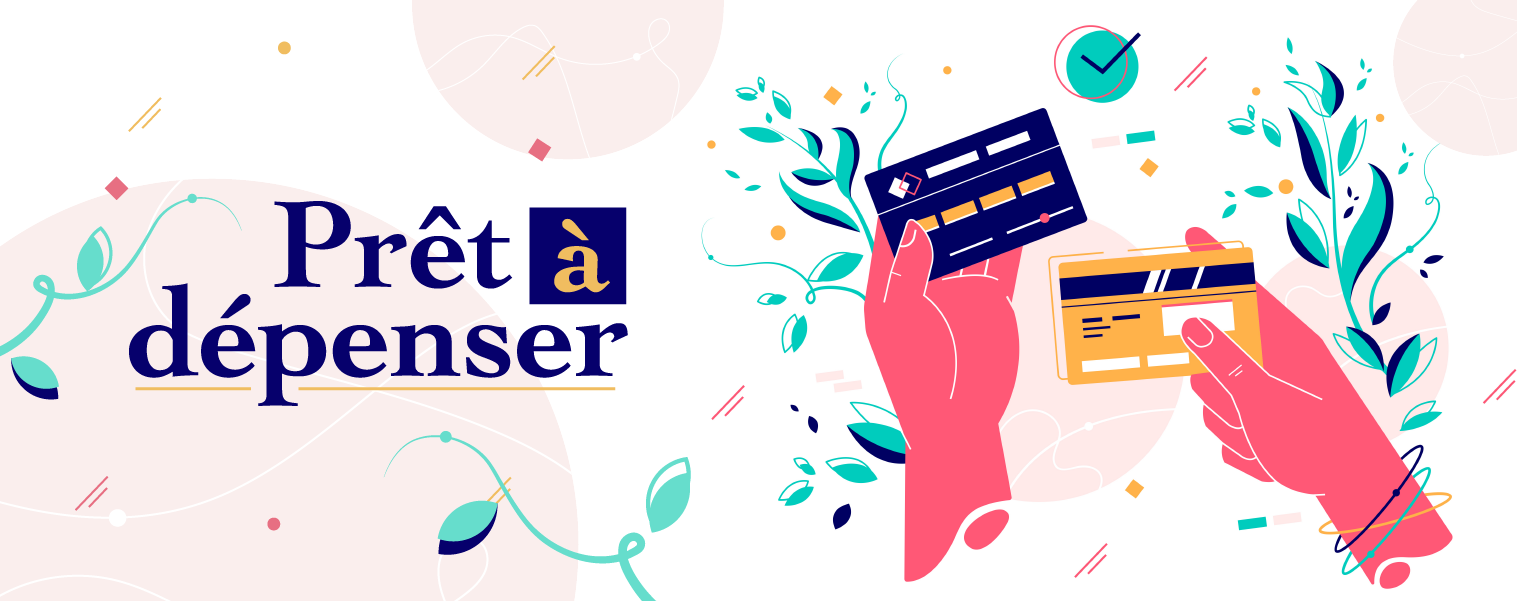

La société financière, **"Prêt à dépenser"**, propose des crédits à la consommation pour des personnes ayant peu ou pas du tout d'historique de prêt. "Prêt à dépenser" souhaite mettre en œuvre un **outil de “scoring crédit”** pour calculer la probabilité qu’un client rembourse son crédit, puis classifie la demande en crédit accordé ou refusé. Elle souhaite donc développer un algorithme de classification en s’appuyant sur des sources de données variées (données comportementales, données provenant d'autres institutions financières, etc.)

**La mission :**
* Construire un modèle de scoring qui donnera une prédiction sur la probabilité de faillite d'un client de façon automatique.
* Analyser les features qui contribuent le plus au modèle, d’une manière générale (feature importance globale) et au niveau d’un client (feature importance locale), afin, dans un soucis de transparence, de permettre à un chargé d’études de mieux comprendre le score attribué par le modèle.
* Mettre en production le modèle de scoring de prédiction à l’aide d’une API et réaliser une interface de test de cette API.
* Mettre en œuvre une approche globale MLOps de bout en bout, du tracking des expérimentations à l’analyse en production du data drift.

# Import libraries

In [74]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd 

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

import LeRay_Adeline_2_3_preprocess_functions_102024 as pfc

In [2]:
# Version python
!python --version
# Version des librairies utilisées
print('\n'.join(f'{m.__name__} - {m.__version__}' 
                for m in globals().values() 
                if getattr(m, '__version__', None)))

Python 3.11.4numpy - 1.24.4
pandas - 2.2.2
seaborn - 0.13.2



In [3]:
# Paramètres par défauts des graphiques
sns.set_style('whitegrid')        # darkgrid, white grid, dark, white and ticks
plt.rc('axes', titlesize=13)     # fontsize of the axes title
plt.rc('axes', labelsize=13)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=11)    # fontsize of the tick labels
plt.rc('ytick', labelsize=11)    # fontsize of the tick labels
plt.rc('legend', fontsize=11)    # legend fontsize
plt.rc('font', size=11)          # controls default text sizes
width = 7
height = 5
plt.figure(figsize=(width, height));

<Figure size 700x500 with 0 Axes>

# Import Data

## Sources data

Le diagramme suivant montre les relations entre les différentes tables.

![image](https://storage.googleapis.com/kaggle-media/competitions/home-credit/home_credit.png)

## Import table

In [4]:
# Show columns description
pfc.show_col_description('application_{train|test}.csv')

,Row,Description
0,SK_ID_CURR,ID of loan in our sample
1,TARGET,"Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)"
2,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving
3,CODE_GENDER,Gender of the client
4,FLAG_OWN_CAR,Flag if the client owns a car
5,FLAG_OWN_REALTY,Flag if client owns a house or flat
6,CNT_CHILDREN,Number of children the client has
7,AMT_INCOME_TOTAL,Income of the client
8,AMT_CREDIT,Credit amount of the loan
9,AMT_ANNUITY,Loan annuity


In [5]:
# Training data
app_train = pfc.load_table('application_train.csv')

application_train.csv data shape:  (307511, 122)


In [6]:
# Testing data features
app_test = pfc.load_table('application_test.csv')

application_test.csv data shape:  (48744, 121)


In [7]:
# Concatenate train and test
app_train_test = pd.concat([app_train, app_test], axis=0, ignore_index=True)

# Exploratory Data Analysis - Application table

## Inspection of dataframe

Dataframe
--------------------------------------------------


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1.0,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0.0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0.0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0.0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0.0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0



Dimensions du dataframe, Types de variables, Description statistique du dataframe, Valeurs non-null
--------------------------------------------------


╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 356255 │ │ float64     │ 66    │                                                          │
│ │ Number of columns │ 122    │ │ int32       │ 40    │                                                          │
│ └───────────────────┴────────┘ │ string      │ 16    │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name  ┃ NA     ┃ NA %  ┃ mean    ┃ sd     ┃ p0      ┃ p25    ┃ p50    ┃ p75    ┃ p100      ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━┩  │
│ │ SK_ID_CURR   │      0 │     0 │  280000 │ 100000 │  100000 │ 190000 │ 280000 │ 370000 │    460000 │ ▇▇▇▇▇▇ │  │
│ │ TARGET       │  48744 │ 13.68 │   0.081 │   0.27 │       0 │      0 │      0 │      0 │         1 │ ▇    ▁ │  │
│ │ CNT_CHILDREN │      0 │     0 │    0.41 │   0.72 │       0 │      0 │      0 │      1 │        20 │   ▇    │  │
│ │ AMT_INCOME_T │      0 │     0 │  170000 │ 220000 │   26000 │ 110000 │ 150000 │ 200000 │ 120000000 │   ▇    │  │
│ │ OTAL         │        │       │         │        │         │        │        │        │           │        │  │
│ │ AMT_CREDIT   │      0 │     0 │  590000 │ 400000 │   45000 │ 270000 │ 500000 │ 800000 │   4000000 │   ▇▃   │  │
│ │ AMT_ANNUITY  │     36 │  0.01 │   27000 │  15000 │    1600 │  17000 │  25000 │  35000 │    260000 │   ▇▁   │  │
│ │ AMT_GOODS_PR │    278 │  0.08 │  530000 │ 370000 │   40000 │ 230000 │ 450000 │ 680000 │   4000000 │   ▇▂   │  │
│ │ ICE          │        │       │         │        │         │        │        │        │           │        │  │
│ │ REGION_POPUL │      0 │     0 │   0.021 │  0.014 │ 0.00025 │   0.01 │  0.019 │  0.029 │     0.073 │ ▇▇▇▁ ▁ │  │
│ │ ATION_RELATI │        │       │         │        │         │        │        │        │           │        │  │
│ │ VE           │        │       │         │        │         │        │        │        │           │        │  │
│ │ DAYS_BIRTH   │      0 │     0 │  -16000 │   4400 │  -25000 │ -20000 │ -16000 │ -12000 │     -7300 │ ▃▆▇▇▇▃ │  │
│ │ DAYS_EMPLOYE │      0 │     0 │   64000 │ 140000 │  -18000 │  -2800 │  -1200 │   -290 │    370000 │ ▇    ▂ │  │
│ │ D            │        │       │         │        │         │        │        │        │           │        │  │
│ │ DAYS_REGISTR │      0 │     0 │   -5000 │   3500 │  -25000 │  -7500 │  -4500 │  -2000 │         0 │   ▁▃▆▇ │  │
│ │ ATION        │        │       │         │        │         │        │        │        │           │        │  │
│ │ DAYS_ID_PUBL │      0 │     0 │   -3000 │   1500 │   -7200 │  -4300 │  -3300 │  -1700 │         0 │  ▂▇▅▅▃ │  │
│ │ ISH          │        │       │         │        │         │        │        │        │           │        │  │
│ │ OWN_CAR_AGE  │ 235241 │ 66.03 │      12 │     12 │       0 │      5 │      9 │     15 │        91 │   ▇▂   │  │
│ │ FLAG_MOBIL   │      0 │     0 │       1 │ 0.0024 │       0 │      1 │      1 │      1 │         1 │      ▇ │  │
│ │ FLAG_EMP_PHO │      0 │     0 │    0.82 │   0.39 │  

None

Valeurs uniques par variable
--------------------------------------------------
SK_ID_CURR                      356255
TARGET                               2
NAME_CONTRACT_TYPE                   2
CODE_GENDER                          3
FLAG_OWN_CAR                         2
FLAG_OWN_REALTY                      2
CNT_CHILDREN                        16
AMT_INCOME_TOTAL                  2741
AMT_CREDIT                        6480
AMT_ANNUITY                      14166
AMT_GOODS_PRICE                   1291
NAME_TYPE_SUITE                      7
NAME_INCOME_TYPE                     8
NAME_EDUCATION_TYPE                  5
NAME_FAMILY_STATUS                   6
NAME_HOUSING_TYPE                    6
REGION_POPULATION_RELATIVE          82
DAYS_BIRTH                       17467
DAYS_EMPLOYED                    12896
DAYS_REGISTRATION                15898
DAYS_ID_PUBLISH                   6224
OWN_CAR_AGE                         63
FLAG_MOBIL                           2
FLAG_EMP_PHONE   

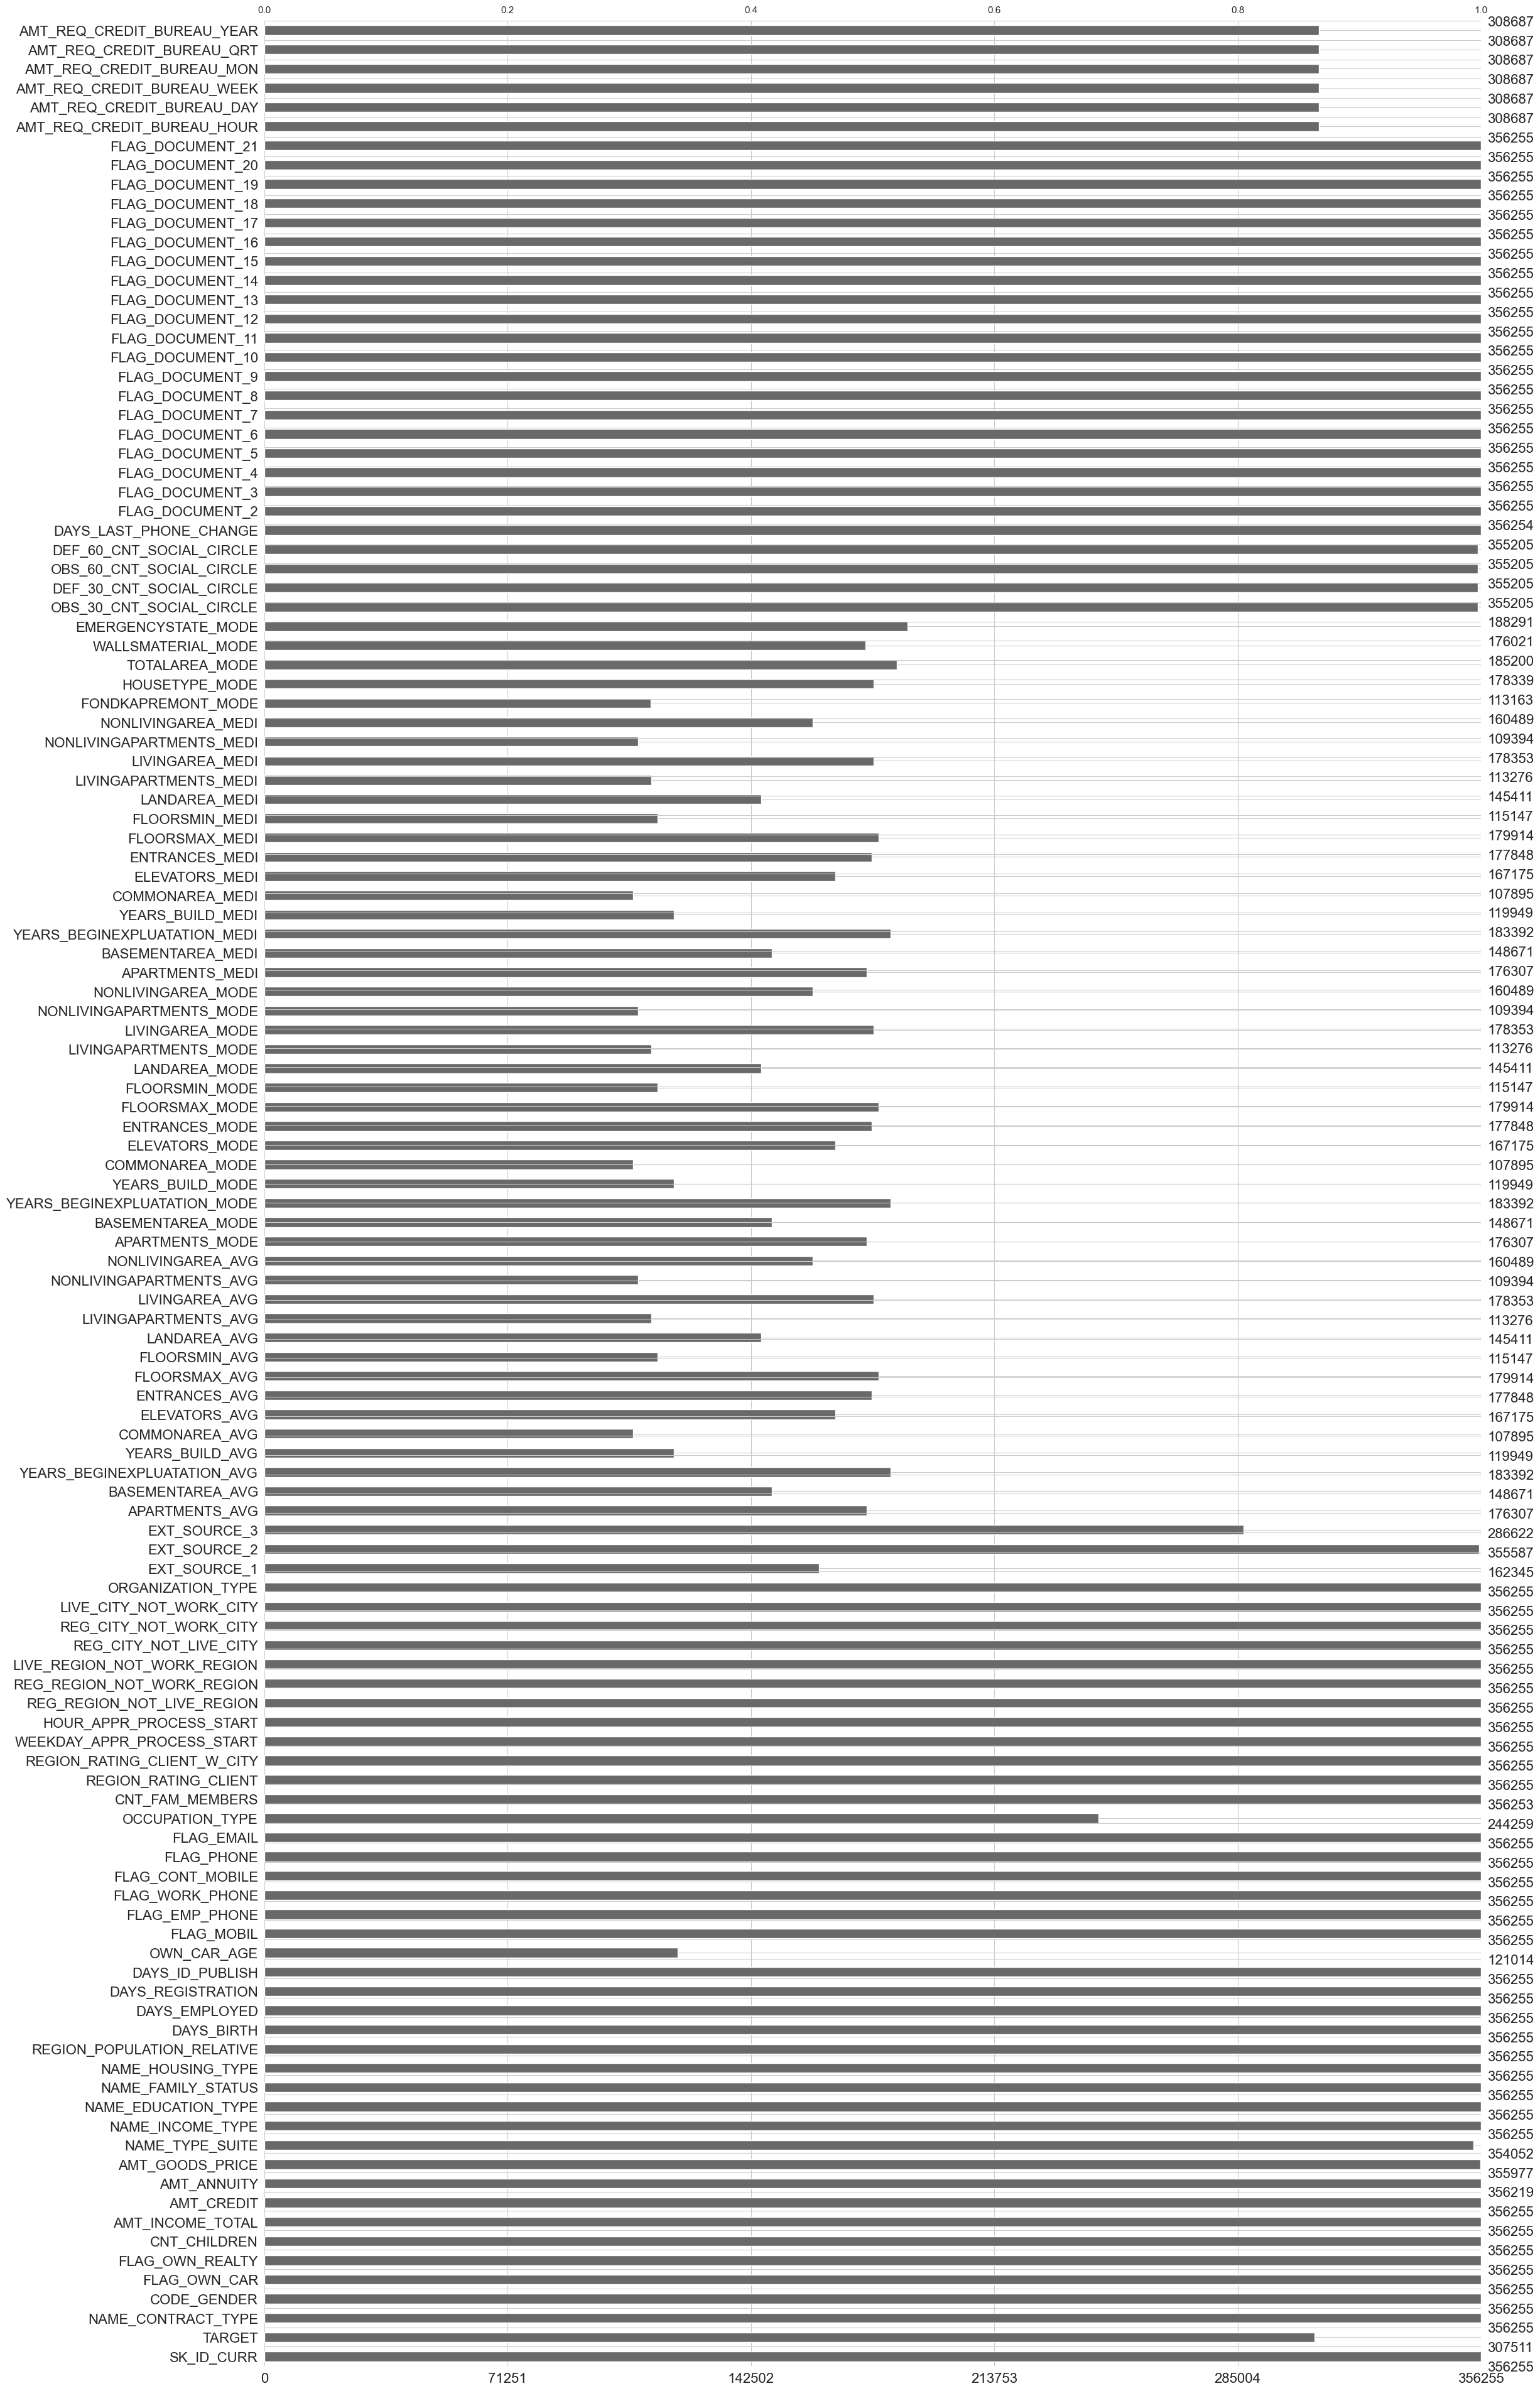

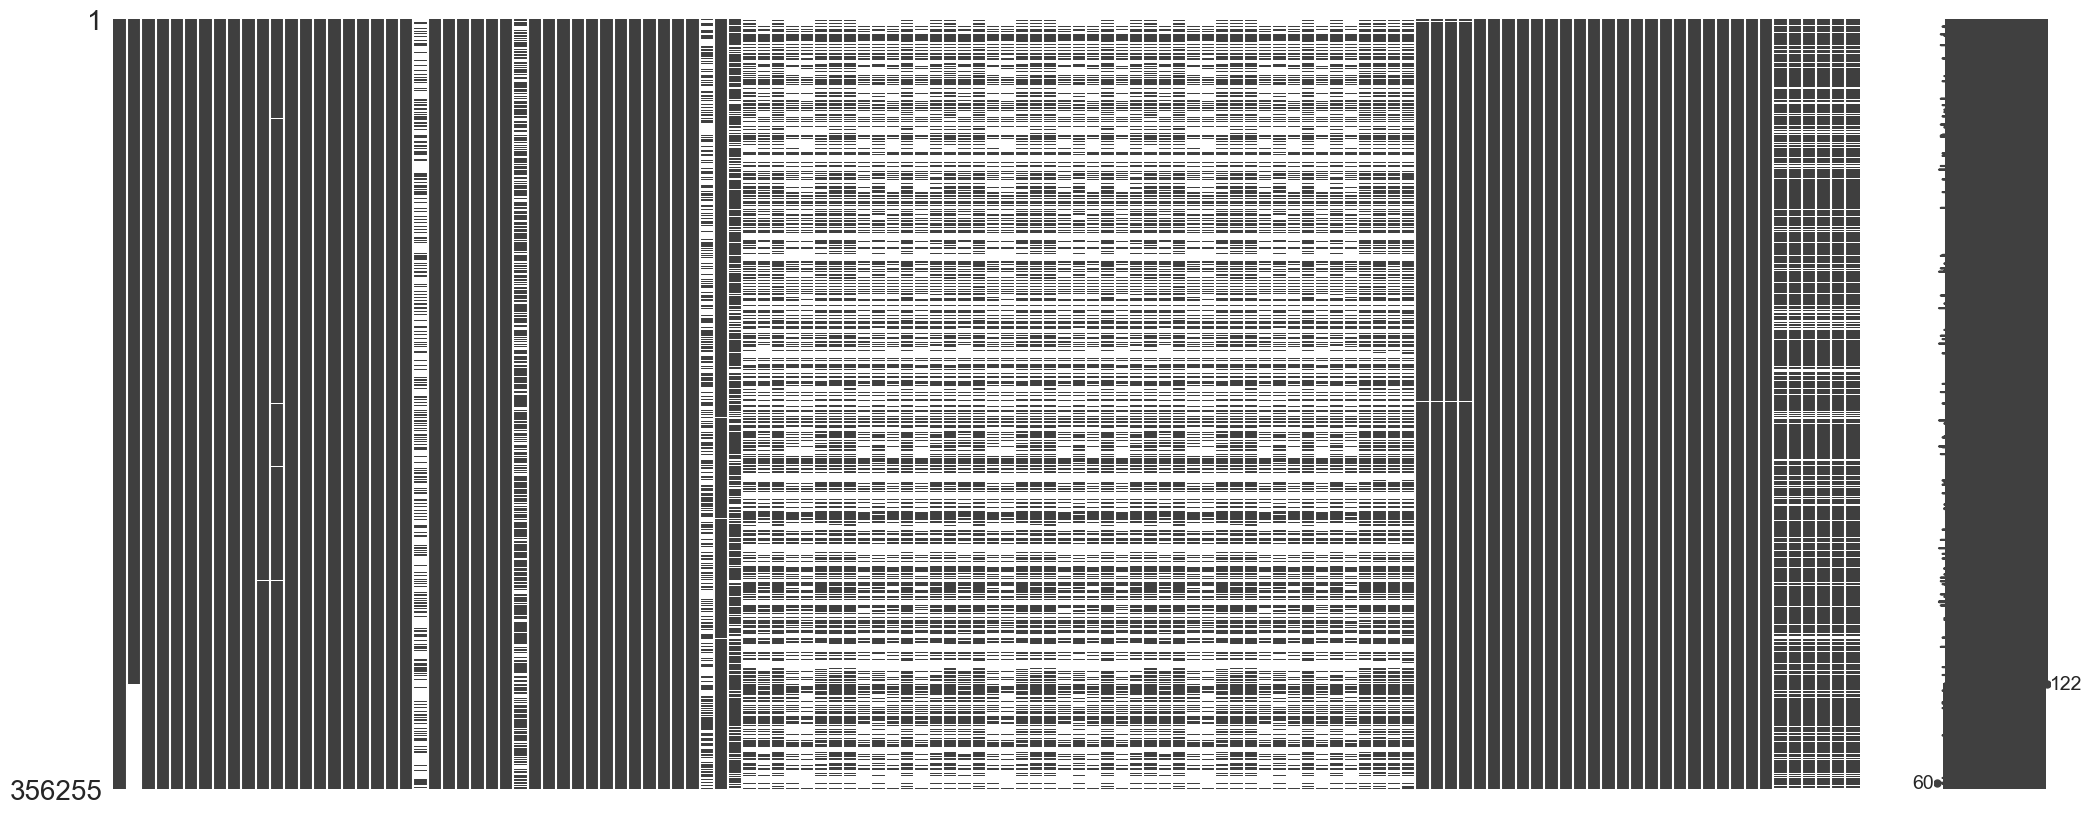

In [8]:
# Data inspection
pfc.inspection(app_train_test, missing_graph=True)

## Target column

La `TARGET` n'est pas équilibrée -> unbalanced dataset.

In [9]:
app_train_test['TARGET'].value_counts()

TARGET
0.0    282686
1.0     24825
Name: count, dtype: int64

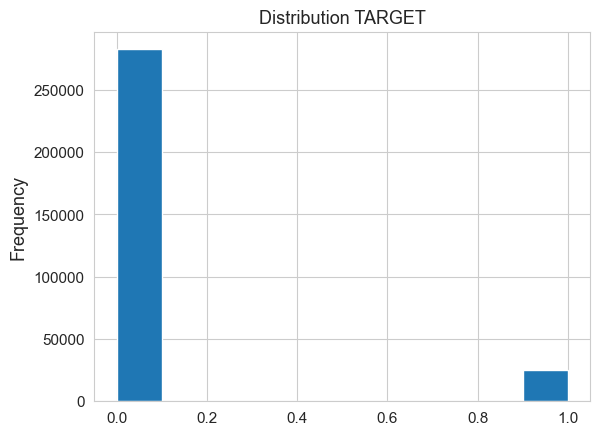

In [10]:
app_train_test.loc[~app_train_test['TARGET'].isna(), 'TARGET'].astype(int).plot.hist(title ='Distribution TARGET');

## Encoding Categorical Variables

Les dataframes contiennent plusieurs colonnes de type catégorielles : il est nécessaire de les encoder pour pouvoir les utiliser dans un modèle de Machine Learning.

In [11]:
# Encode categorial variables
app_train_test, app_cat = pfc.encode_categorical_columns(app_train_test)

## Anomalies

### `DAYS_BIRTH`
Les valeurs de la colonne `DAYS_BIRTH` sont négatifs car ils sont enregistrés par rapport à la date de la demande de prêt actuelle. Pour voir ces données en années, il faut les multiplier par -1 et diviser par le nombre de jours dans une année (365):

In [12]:
(app_train_test['DAYS_BIRTH']/365).describe()

count    356255.000000
mean        -43.948627
std          11.941929
min         -69.120548
25%         -53.906849
50%         -43.164384
75%         -34.041096
max         -20.104110
Name: DAYS_BIRTH, dtype: float64

In [13]:
app_train_test['DAYS_BIRTH'] = abs(app_train_test['DAYS_BIRTH'])

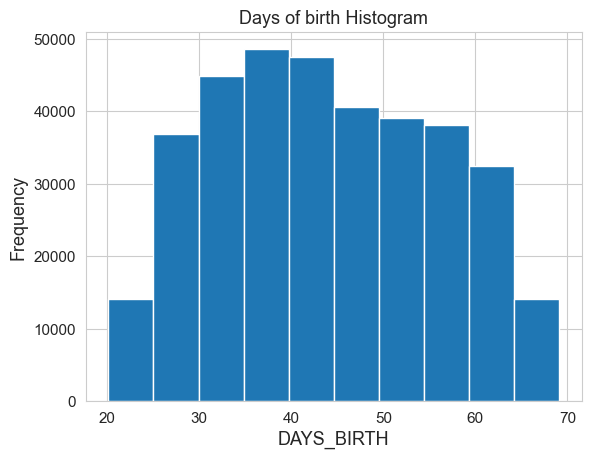

In [14]:
(app_train_test['DAYS_BIRTH']/365).plot.hist(title = 'Days of birth Histogram');
plt.xlabel('DAYS_BIRTH');

=> Pas d'outliers dans `DAYS_BIRTH`

### `DAYS_EMPLOYED`

In [15]:
app_train_test['DAYS_EMPLOYED'].describe()

count    356255.000000
mean      64317.231413
std      141705.532576
min      -17912.000000
25%       -2781.000000
50%       -1224.000000
75%        -290.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

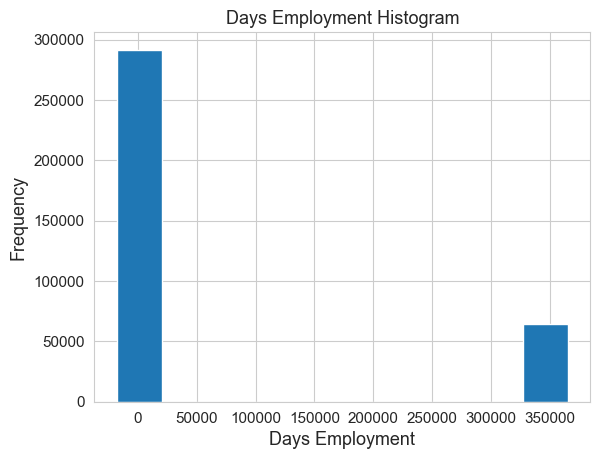

In [16]:
app_train_test['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

Il y a des ouliers dans `DAYS_EMPLOYED`.

In [17]:
anom = app_train_test[app_train_test['DAYS_EMPLOYED'] == 365243]
non_anom = app_train_test[app_train_test['DAYS_EMPLOYED'] != 365243]
print('The non-anomalies default on %0.2f%% of loans' % (100 * non_anom['TARGET'].mean()))
print('The anomalies default on %0.2f%% of loans' % (100 * anom['TARGET'].mean()))
print('There are %d anomalous days of employment' % len(anom))

The non-anomalies default on 8.66% of loans
The anomalies default on 5.40% of loans
There are 64648 anomalous days of employment


In [18]:
# Create an anomalous flag column
app_train_test['DAYS_EMPLOYED_ANOM'] = app_train_test["DAYS_EMPLOYED"] == 365243

# Replace the anomalous values with nan
app_train_test['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

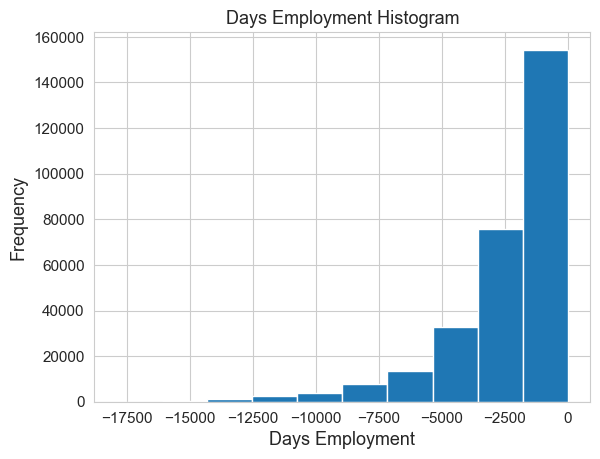

In [19]:
app_train_test['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

## Correlations

In [20]:
# Find correlations with the target and sort
correlations = app_train_test[~app_train_test['TARGET'].isna()].corr()['TARGET'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 DAYS_REGISTRATION                                    0.041975
OCCUPATION_TYPE_Laborers                             0.043019
FLAG_DOCUMENT_3                                      0.044346
REG_CITY_NOT_LIVE_CITY                               0.044395
FLAG_EMP_PHONE                                       0.045982
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
REG_CITY_NOT_WORK_CITY                               0.050994
DAYS_ID_PUBLISH                                      0.051457
CODE_GENDER_M                                        0.054713
DAYS_LAST_PHONE_CHANGE                               0.055218
NAME_INCOME_TYPE_Working                             0.057481
REGION_RATING_CLIENT                                 0.058899
REGION_RATING_CLIENT_W_CITY                          0.060893
DAYS_EMPLOYED                                        0.074958
TARGET                                               1.000000
Name: TARGET, dtype: float64

Most Negati

## Effect of Age on Repayment

In [21]:
# Find the correlation of the positive days since birth and target
round(app_train_test['DAYS_BIRTH'].corr(app_train_test['TARGET']),3)

-0.078

Plus les clients sont âgés, plus ils ont tendance à rembourser leur crédit dans les temps.

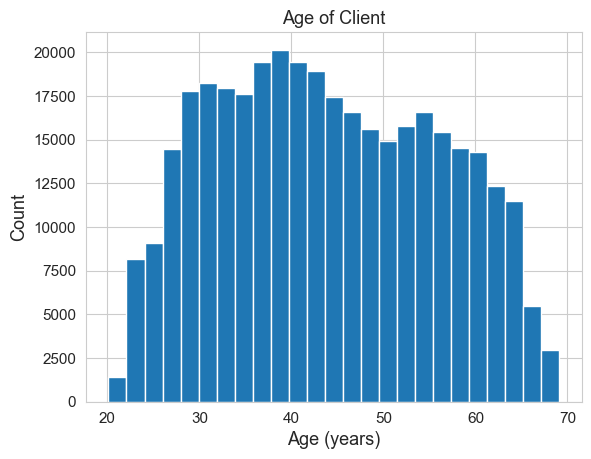

In [22]:
# Plot the distribution of ages in years
plt.hist(app_train_test['DAYS_BIRTH']/365, bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');

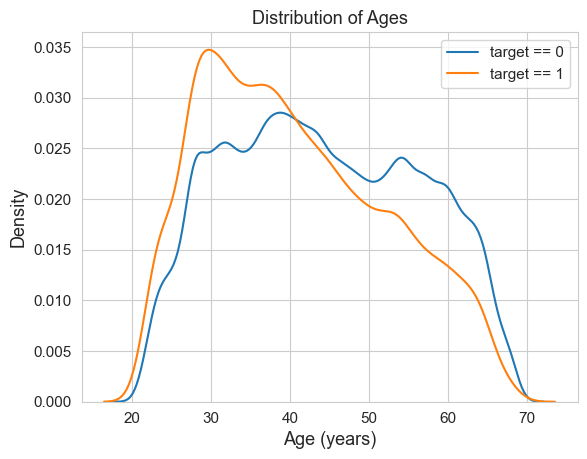

In [23]:
# KDE plot of loans that were repaid on time
sns.kdeplot(app_train_test.loc[app_train_test['TARGET'] == 0, 'DAYS_BIRTH']/365, label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(app_train_test.loc[app_train_test['TARGET'] == 1, 'DAYS_BIRTH']/365, label = 'target == 1')

# Labeling of plot
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages')
plt.legend();

In [24]:
# Age information into a separate dataframe
age_data = app_train_test[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365

# Bin the age data
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
age_data.head(10)

,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1.0,9461,25.920548,"(25.0, 30.0]"
1,0.0,16765,45.931507,"(45.0, 50.0]"
2,0.0,19046,52.180822,"(50.0, 55.0]"
3,0.0,19005,52.068493,"(50.0, 55.0]"
4,0.0,19932,54.608219,"(50.0, 55.0]"
5,0.0,16941,46.413699,"(45.0, 50.0]"
6,0.0,13778,37.747945,"(35.0, 40.0]"
7,0.0,18850,51.643836,"(50.0, 55.0]"
8,0.0,20099,55.065753,"(55.0, 60.0]"
9,0.0,14469,39.641096,"(35.0, 40.0]"


In [25]:
# Group by the bin and calculate averages
age_groups  = age_data.groupby('YEARS_BINNED').mean()
age_groups

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(20.0, 25.0]",0.123036,8538.378305,23.392817
"(25.0, 30.0]",0.111436,10158.553439,27.831653
"(30.0, 35.0]",0.102814,11856.378412,32.483229
"(35.0, 40.0]",0.089414,13708.090633,37.556413
"(40.0, 45.0]",0.078491,15497.596332,42.459168
"(45.0, 50.0]",0.074171,17323.579317,47.461861
"(50.0, 55.0]",0.066968,19193.920120,52.586083
"(55.0, 60.0]",0.055314,20982.106594,57.485224
"(60.0, 65.0]",0.052737,22779.717434,62.410185


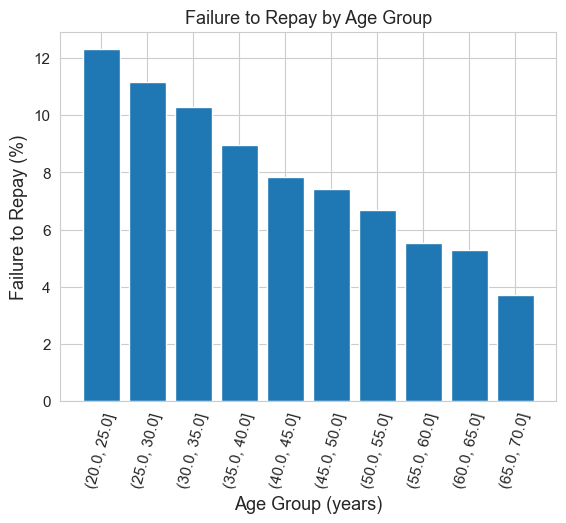

In [26]:
# Graph the age bins and the average of the target as a bar plot
plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'])

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');

There is a clear trend: younger applicants are more likely to not repay the loan! The rate of failure to repay is above 10% for the youngest three age groups and beolow 5% for the oldest age group.

## Exterior sources
The 3 variables with the strongest negative correlations with the target are `EXT_SOURCE_1`, `EXT_SOURCE_2`, and `EXT_SOURCE_3`.
According to the documentation, these features represent a "normalized score from external data source".

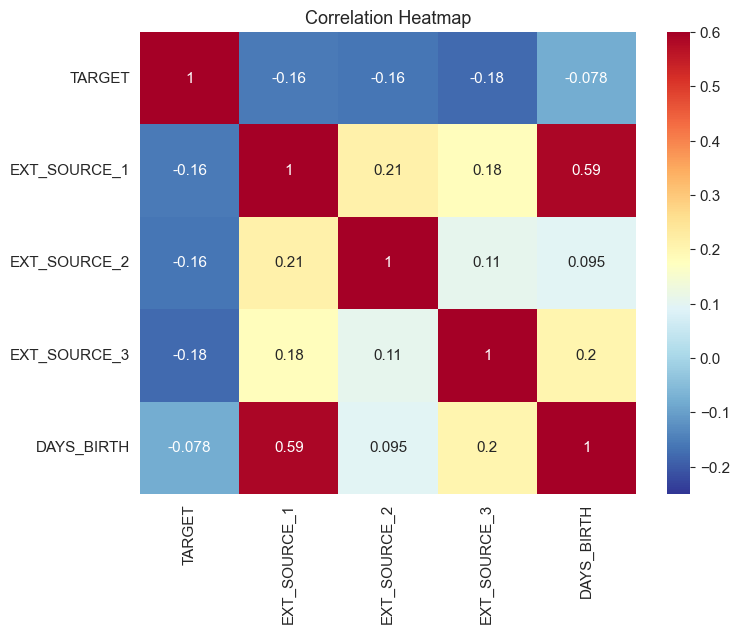

In [27]:
# Extract the EXT_SOURCE variables and show correlations
ext_data = app_train_test[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()

# Heatmap of correlations
plt.figure(figsize = (8, 6))
sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');

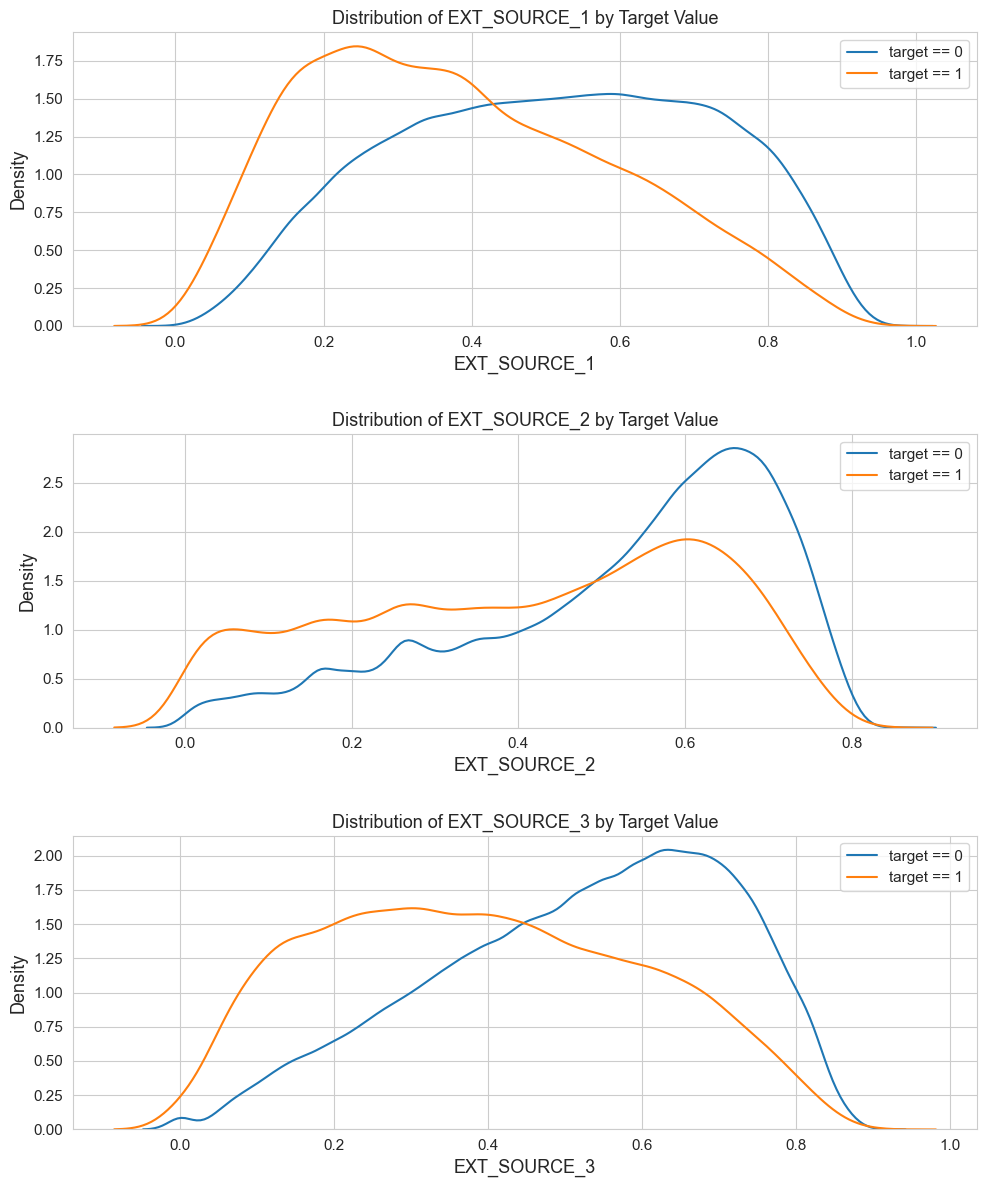

In [28]:
plt.figure(figsize = (10, 12))

# iterate through the sources
for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
    
    # create a new subplot for each source
    plt.subplot(3, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(app_train_test.loc[app_train_test['TARGET'] == 0, source], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(app_train_test.loc[app_train_test['TARGET'] == 1, source], label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % source)
    plt.xlabel('%s' % source); plt.ylabel('Density')
    plt.legend();
    
plt.tight_layout(h_pad = 2.5)
    

`EXT_SOURCE_3` displays the greatest difference between the values of the target. We can clearly see that this feature has some relationship to the likelihood of an applicant to repay a loan.

# Feature engineering - application table

New features
* `CREDIT_INCOME_PERCENT`: pourcentage du montant du crédit par rapport au revenu d'un client.
* `ANNUITY_INCOME_PERCENT`: pourcentage de la mensualité du prêt par rapport au revenu d'un client.
* `DAYS_EMPLOYED_PERCENT`: pourcentage du nombre de jours employés par rapport à l'âge du client.
* `INCOME_PER_PERSON` : revenu par personne dans la famille du client.
* `PAYMENT_RATE` : taux de remboursement (mensualité par rapport au montant total du crédit).

* **Create New Variables**

In [29]:
app_train_test['CREDIT_INCOME_PERCENT'] = app_train_test['AMT_CREDIT'] / app_train_test['AMT_INCOME_TOTAL']
app_train_test['ANNUITY_INCOME_PERCENT'] = app_train_test['AMT_ANNUITY'] / app_train_test['AMT_INCOME_TOTAL']
app_train_test['DAYS_EMPLOYED_PERCENT'] = app_train_test['DAYS_EMPLOYED'] / app_train_test['DAYS_BIRTH']
app_train_test['INCOME_PER_PERSON'] = app_train_test['AMT_INCOME_TOTAL'] / app_train_test['CNT_FAM_MEMBERS']
app_train_test['PAYMENT_RATE'] = app_train_test['AMT_ANNUITY'] / app_train_test['AMT_CREDIT']

In [30]:
app_train_test.shape

(356255, 249)

* **Visualize New Variables**

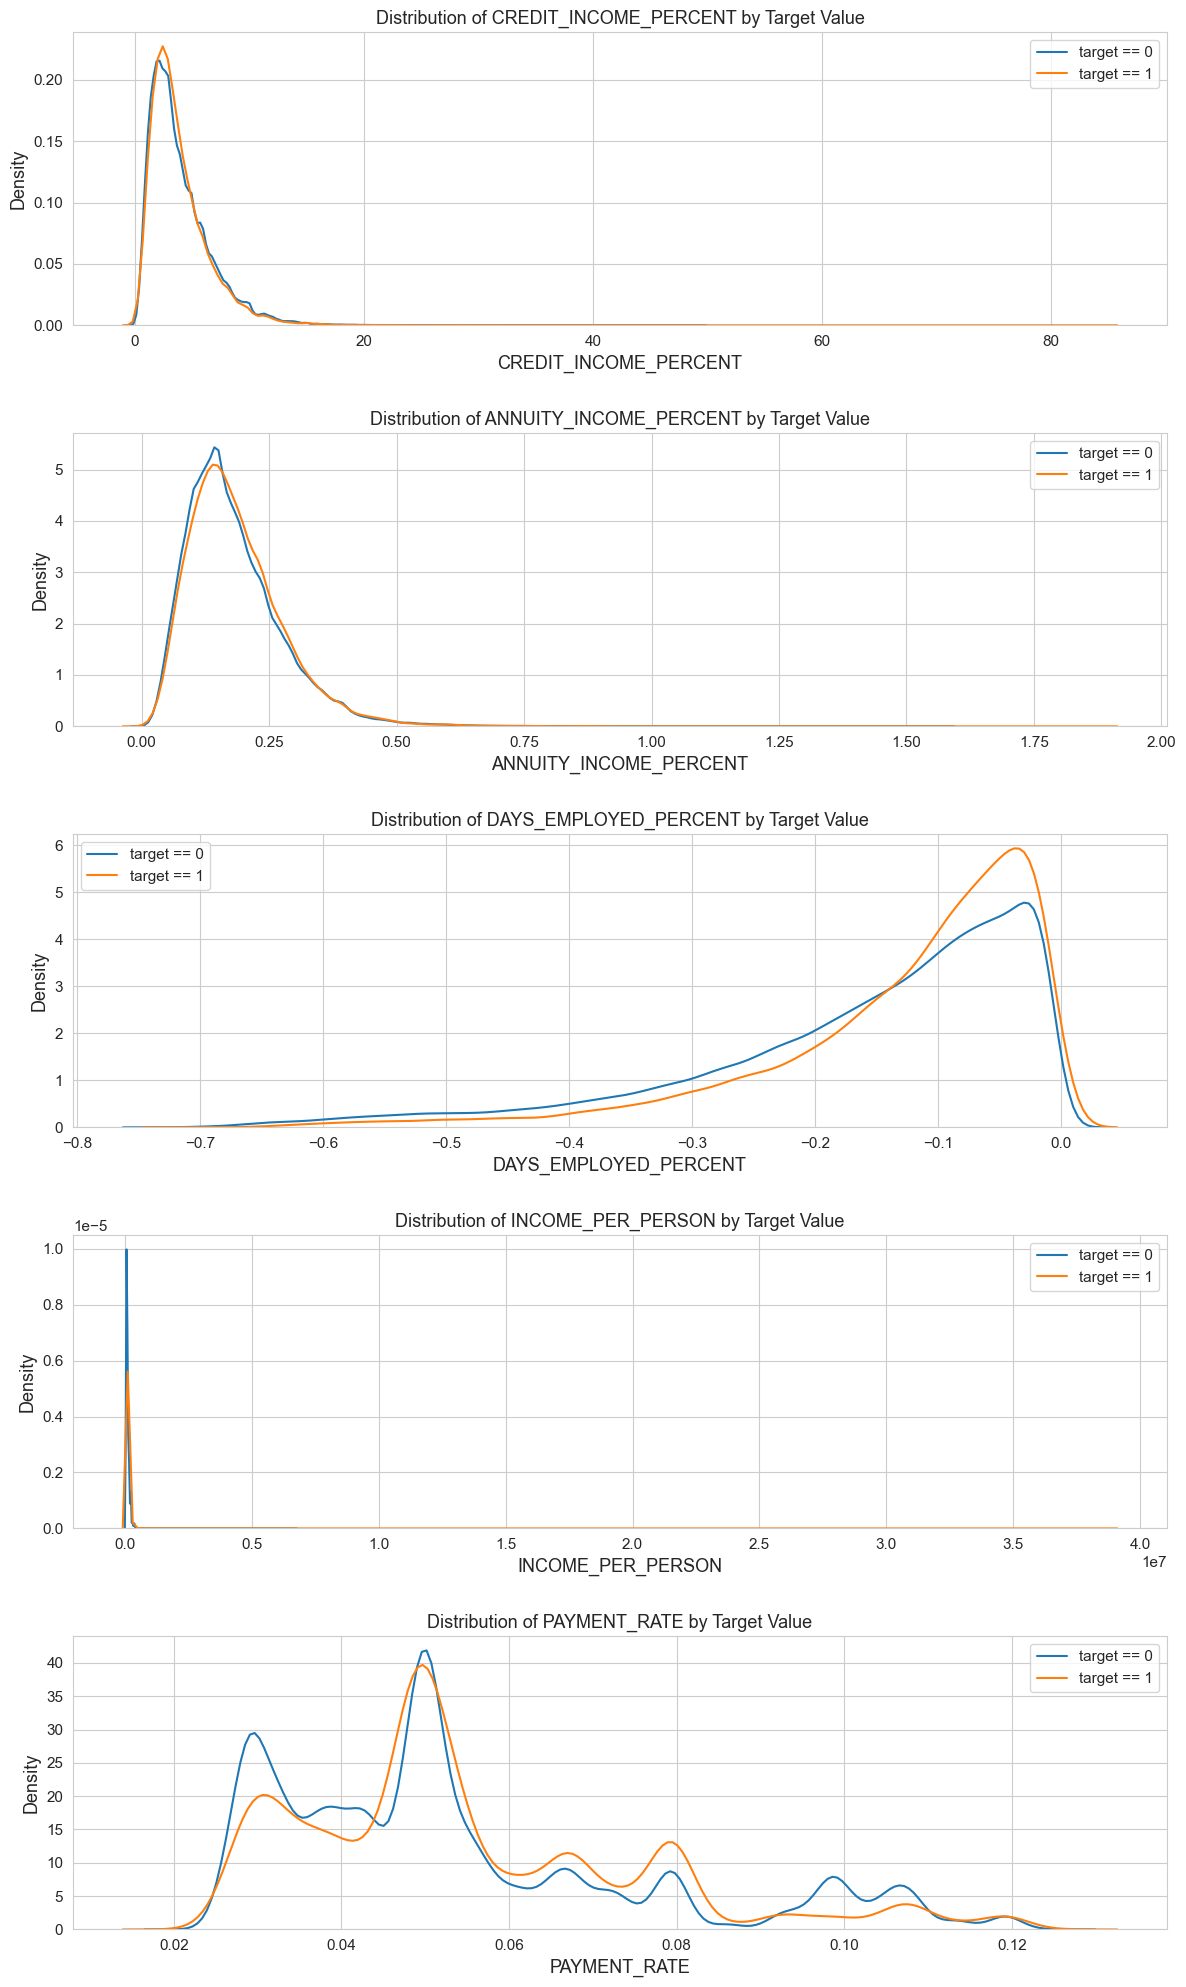

In [31]:
plt.figure(figsize = (12, 20))
# iterate through the new features
for i, feature in enumerate(['CREDIT_INCOME_PERCENT', 
                             'ANNUITY_INCOME_PERCENT', 
                             'DAYS_EMPLOYED_PERCENT', 
                             'INCOME_PER_PERSON', 
                             'PAYMENT_RATE']):
    
    # create a new subplot for each source
    plt.subplot(5, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(app_train_test.loc[app_train_test['TARGET'] == 0, feature], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(app_train_test.loc[app_train_test['TARGET'] == 1, feature], label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % feature)
    plt.xlabel('%s' % feature); plt.ylabel('Density')
    plt.legend();
    
plt.tight_layout(h_pad = 2.5)

# Preprocess other tables

## Preprocess and aggregate

In [32]:
df = app_train_test

In [33]:
df = pfc.aggregate_tables(df, debug=False)


**************************************************
Dataframe bureau.csv
**************************************************

bureau.csv data shape:  (1716428, 17)


,Row,Description
122,SK_ID_CURR,"ID of loan in our sample - one loan in our sample can have 0,1,2 or more related previous credits in credit bureau"
123,SK_BUREAU_ID,Recoded ID of previous Credit Bureau credit related to our loan (unique coding for each loan application)
124,CREDIT_ACTIVE,Status of the Credit Bureau (CB) reported credits
125,CREDIT_CURRENCY,Recoded currency of the Credit Bureau credit
126,DAYS_CREDIT,How many days before current application did client apply for Credit Bureau credit
127,CREDIT_DAY_OVERDUE,Number of days past due on CB credit at the time of application for related loan in our sample
128,DAYS_CREDIT_ENDDATE,Remaining duration of CB credit (in days) at the time of application in Home Credit
129,DAYS_ENDDATE_FACT,Days since CB credit ended at the time of application in Home Credit (only for closed credit)
130,AMT_CREDIT_MAX_OVERDUE,Maximal amount overdue on the Credit Bureau credit so far (at application date of loan in our sample)
131,CNT_CREDIT_PROLONG,How many times was the Credit Bureau credit prolonged


Dataframe
--------------------------------------------------


,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN



Dimensions du dataframe, Types de variables, Description statistique du dataframe, Valeurs non-null
--------------------------------------------------


╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                 Data Types                                                                │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                         │
│ ┃ dataframe         ┃ Values  ┃ ┃ Column Type ┃ Count ┃                                                         │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                         │
│ │ Number of rows    │ 1716428 │ │ float64     │ 8     │                                                         │
│ │ Number of columns │ 17      │ │ int32       │ 6     │                                                         │
│ └───────────────────┴─────────┘ │ string      │ 3     │                                                         │
│                                 └─────────────┴───────┘                                                         │
│                                                     number                                                      │
│ ┏━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_n ┃         ┃       ┃         ┃         ┃          ┃         ┃         ┃         ┃         ┃        ┃  │
│ ┃ ame      ┃ NA      ┃ NA %  ┃ mean    ┃ sd      ┃ p0       ┃ p25     ┃ p50     ┃ p75     ┃ p100    ┃ hist   ┃  │
│ ┡━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━┩  │
│ │ SK_ID_CU │       0 │     0 │  280000 │  100000 │   100000 │  190000 │  280000 │  370000 │  460000 │ ▇▇▇▇▇▇ │  │
│ │ RR       │         │       │         │         │          │         │         │         │         │        │  │
│ │ SK_ID_BU │       0 │     0 │ 5900000 │  530000 │  5000000 │ 5500000 │ 5900000 │ 6400000 │ 6800000 │ ▇▇▇▇▇▇ │  │
│ │ REAU     │         │       │         │         │          │         │         │         │         │        │  │
│ │ DAYS_CRE │       0 │     0 │   -1100 │     800 │    -2900 │   -1700 │    -990 │    -470 │       0 │ ▃▃▃▆▇▇ │  │
│ │ DIT      │         │       │         │         │          │         │         │         │         │        │  │
│ │ CREDIT_D │       0 │     0 │    0.82 │      37 │        0 │       0 │       0 │       0 │    2800 │   ▇    │  │
│ │ AY_OVERD │         │       │         │         │          │         │         │         │         │        │  │
│ │ UE       │         │       │         │         │          │         │         │         │         │        │  │
│ │ DAYS_CRE │  105553 │  6.15 │     510 │    5000 │   -42000 │   -1100 │    -330 │     470 │   31000 │     ▇  │  │
│ │ DIT_ENDD │         │       │         │         │          │         │         │         │         │        │  │
│ │ ATE      │         │       │         │         │          │         │         │         │         │        │  │
│ │ DAYS_END │  633653 │ 36.92 │   -1000 │     710 │   -42000 │   -1500 │    -900 │    -420 │       0 │      ▇ │  │
│ │ DATE_FAC │         │       │         │         │          │         │         │         │         │        │  │
│ │ T        │         │       │         │         │          │         │         │         │         │        │  │
│ │ AMT_CRED │ 1124488 │ 65.51 │    3800 │  210000 │        0 │       0 │       0 │       0 │ 1200000 │   ▇    │  │
│ │ IT_MAX_O │         │       │         │         │          │         │         │         │      00 │        │  │
│ │ VERDUE   │         │       │         │         │          │         │         │         │         │        │  │
│ │ CNT_CRED │       0 │     0 │  0.0064 │   0.096 │        0 │       0 │       0 │       0 │       9 │   ▇    │  │
│ │ IT_PROLO │         │       │         │         │          │         │         │         │         │        │  │
│ │ NG       │         │       │         │         │    

None

Valeurs uniques par variable
--------------------------------------------------
SK_ID_CURR                 305811
SK_ID_BUREAU              1716428
CREDIT_ACTIVE                   4
CREDIT_CURRENCY                 4
DAYS_CREDIT                  2923
CREDIT_DAY_OVERDUE            942
DAYS_CREDIT_ENDDATE         14096
DAYS_ENDDATE_FACT            2917
AMT_CREDIT_MAX_OVERDUE      68251
CNT_CREDIT_PROLONG             10
AMT_CREDIT_SUM             236708
AMT_CREDIT_SUM_DEBT        226537
AMT_CREDIT_SUM_LIMIT        51726
AMT_CREDIT_SUM_OVERDUE       1616
CREDIT_TYPE                    15
DAYS_CREDIT_UPDATE           2982
AMT_ANNUITY                 40321
dtype: int64

Nombre de doublons
--------------------------------------------------
0


Echantillon des modalités des variables qualitatives (5 modalités max)
--------------------------------------------------
CREDIT_ACTIVE : ['Closed' 'Active' 'Sold' 'Bad debt']

CREDIT_CURRENCY : ['currency 1' 'currency 2' 'currency 4' 'currency 3']

,Row,Description
139,SK_BUREAU_ID,Recoded ID of Credit Bureau credit (unique coding for each application) - use this to join to CREDIT_BUREAU table
140,MONTHS_BALANCE,Month of balance relative to application date (-1 means the freshest balance date)
141,STATUS,"Status of Credit Bureau loan during the month (active, closed, DPD0-30, [C means closed, X means status unknown, 0 means no DPD, 1 means maximal did during month between 1-30, 2 means DPD 31-60, 5 means DPD 120+ or sold or written off ] )"


Dataframe
--------------------------------------------------


,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C



Dimensions du dataframe, Types de variables, Description statistique du dataframe, Valeurs non-null
--------------------------------------------------


╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│           Data Summary                 Data Types                                                               │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                        │
│ ┃ dataframe         ┃ Values   ┃ ┃ Column Type ┃ Count ┃                                                        │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                        │
│ │ Number of rows    │ 27299925 │ │ int32       │ 2     │                                                        │
│ │ Number of columns │ 3        │ │ string      │ 1     │                                                        │
│ └───────────────────┴──────────┘ └─────────────┴───────┘                                                        │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name     ┃ NA  ┃ NA % ┃ mean    ┃ sd     ┃ p0      ┃ p25     ┃ p50     ┃ p75     ┃ p100    ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━┩  │
│ │ SK_ID_BUREAU    │   0 │    0 │ 6000000 │ 490000 │ 5000000 │ 5700000 │ 6100000 │ 6400000 │ 6800000 │ ▃▃▅▇▆▆ │  │
│ │ MONTHS_BALANCE  │   0 │    0 │     -31 │     24 │     -96 │     -46 │     -25 │     -11 │       0 │ ▁▂▂▃▆▇ │  │
│ └─────────────────┴─────┴──────┴─────────┴────────┴─────────┴─────────┴─────────┴─────────┴─────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ STATUS                    │       0 │          0 │                            1 │                 27299925 │  │
│ └───────────────────────────┴─────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

None

Valeurs uniques par variable
--------------------------------------------------
SK_ID_BUREAU      817395
MONTHS_BALANCE        97
STATUS                 8
dtype: int64

Nombre de doublons
--------------------------------------------------
0


Echantillon des modalités des variables qualitatives (5 modalités max)
--------------------------------------------------
STATUS : ['C' '0' 'X' '1' '2']

Bureau df shape: (305811, 112)
Process bureau and bureau_balance - done in 127s

**************************************************
Dataframe previous_application.csv
**************************************************

previous_application.csv data shape:  (1670214, 37)


,Row,Description
173,SK_ID_PREV,"ID of previous credit in Home credit related to loan in our sample. (One loan in our sample can have 0,1,2 or more previous loan applications in Home Credit, previous application could, but not necessarily have to lead to credit)"
174,SK_ID_CURR,ID of loan in our sample
175,NAME_CONTRACT_TYPE,"Contract product type (Cash loan, consumer loan [POS] ,...) of the previous application"
176,AMT_ANNUITY,Annuity of previous application
177,AMT_APPLICATION,For how much credit did client ask on the previous application
178,AMT_CREDIT,"Final credit amount on the previous application. This differs from AMT_APPLICATION in a way that the AMT_APPLICATION is the amount for which the client initially applied for, but during our approval process he could have received different amount - AMT_CREDIT"
179,AMT_DOWN_PAYMENT,Down payment on the previous application
180,AMT_GOODS_PRICE,Goods price of good that client asked for (if applicable) on the previous application
181,WEEKDAY_APPR_PROCESS_START,On which day of the week did the client apply for previous application
182,HOUR_APPR_PROCESS_START,Approximately at what day hour did the client apply for the previous application


Dataframe
--------------------------------------------------


,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN



Dimensions du dataframe, Types de variables, Description statistique du dataframe, Valeurs non-null
--------------------------------------------------


╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                 Data Types                                                                │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                         │
│ ┃ dataframe         ┃ Values  ┃ ┃ Column Type ┃ Count ┃                                                         │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                         │
│ │ Number of rows    │ 1670214 │ │ string      │ 16    │                                                         │
│ │ Number of columns │ 37      │ │ float64     │ 15    │                                                         │
│ └───────────────────┴─────────┘ │ int32       │ 6     │                                                         │
│                                 └─────────────┴───────┘                                                         │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_na ┃         ┃       ┃         ┃        ┃          ┃         ┃         ┃         ┃         ┃        ┃  │
│ ┃ me        ┃ NA      ┃ NA %  ┃ mean    ┃ sd     ┃ p0       ┃ p25     ┃ p50     ┃ p75     ┃ p100    ┃ hist   ┃  │
│ ┡━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━┩  │
│ │ SK_ID_PRE │       0 │     0 │ 1900000 │ 530000 │  1000000 │ 1500000 │ 1900000 │ 2400000 │ 2800000 │ ▇▇▇▇▇▇ │  │
│ │ V         │         │       │         │        │          │         │         │         │         │        │  │
│ │ SK_ID_CUR │       0 │     0 │  280000 │ 100000 │   100000 │  190000 │  280000 │  370000 │  460000 │ ▇▇▇▇▇▇ │  │
│ │ R         │         │       │         │        │          │         │         │         │         │        │  │
│ │ AMT_ANNUI │  372235 │ 22.29 │   16000 │  15000 │        0 │    6300 │   11000 │   21000 │  420000 │   ▇    │  │
│ │ TY        │         │       │         │        │          │         │         │         │         │        │  │
│ │ AMT_APPLI │       0 │     0 │  180000 │ 290000 │        0 │   19000 │   71000 │  180000 │ 6900000 │   ▇    │  │
│ │ CATION    │         │       │         │        │          │         │         │         │         │        │  │
│ │ AMT_CREDI │       1 │     0 │  200000 │ 320000 │        0 │   24000 │   81000 │  220000 │ 6900000 │   ▇    │  │
│ │ T         │         │       │         │        │          │         │         │         │         │        │  │
│ │ AMT_DOWN_ │  895844 │ 53.64 │    6700 │  21000 │     -0.9 │       0 │    1600 │    7700 │ 3100000 │   ▇    │  │
│ │ PAYMENT   │         │       │         │        │          │         │         │         │         │        │  │
│ │ AMT_GOODS │  385515 │ 23.08 │  230000 │ 320000 │        0 │   51000 │  110000 │  230000 │ 6900000 │   ▇    │  │
│ │ _PRICE    │         │       │         │        │          │         │         │         │         │        │  │
│ │ HOUR_APPR │       0 │     0 │      12 │    3.3 │        0 │      10 │      12 │      15 │      23 │  ▁▇▇▃  │  │
│ │ _PROCESS_ │         │       │         │        │          │         │         │         │         │        │  │
│ │ START     │         │       │         │        │          │         │         │         │         │        │  │
│ │ NFLAG_LAS │       0 │     0 │       1 │  0.059 │        0 │       1 │       1 │       1 │       1 │      ▇ │  │
│ │ T_APPL_IN │         │       │         │        │          │         │         │         │         │        │  │
│ │ _DAY      │         │       │         │        │          │         │         │         │         │        │  │
│ │ RATE_DOWN │  895844 │ 53.64 │    0.08 │   0.11 │ -1.

None

Valeurs uniques par variable
--------------------------------------------------
SK_ID_PREV                     1670214
SK_ID_CURR                      338857
NAME_CONTRACT_TYPE                   4
AMT_ANNUITY                     357959
AMT_APPLICATION                  93885
AMT_CREDIT                       86803
AMT_DOWN_PAYMENT                 29278
AMT_GOODS_PRICE                  93885
WEEKDAY_APPR_PROCESS_START           7
HOUR_APPR_PROCESS_START             24
FLAG_LAST_APPL_PER_CONTRACT          2
NFLAG_LAST_APPL_IN_DAY               2
RATE_DOWN_PAYMENT               207033
RATE_INTEREST_PRIMARY              148
RATE_INTEREST_PRIVILEGED            25
NAME_CASH_LOAN_PURPOSE              25
NAME_CONTRACT_STATUS                 4
DAYS_DECISION                     2922
NAME_PAYMENT_TYPE                    4
CODE_REJECT_REASON                   9
NAME_TYPE_SUITE                      7
NAME_CLIENT_TYPE                     4
NAME_GOODS_CATEGORY                 28
NAME_PORTFOLIO   

,Row,Description
142,SK_ID_PREV,"ID of previous credit in Home Credit related to loan in our sample. (One loan in our sample can have 0,1,2 or more previous loans in Home Credit)"
143,SK_ID_CURR,ID of loan in our sample
144,MONTHS_BALANCE,"Month of balance relative to application date (-1 means the information to the freshest monthly snapshot, 0 means the information at application - often it will be the same as -1 as many banks are not updating the information to Credit Bureau regularly )"
145,CNT_INSTALMENT,Term of previous credit (can change over time)
146,CNT_INSTALMENT_FUTURE,Installments left to pay on the previous credit
147,NAME_CONTRACT_STATUS,Contract status during the month
148,SK_DPD,DPD (days past due) during the month of previous credit
149,SK_DPD_DEF,DPD during the month with tolerance (debts with low loan amounts are ignored) of the previous credit


Dataframe
--------------------------------------------------


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0



Dimensions du dataframe, Types de variables, Description statistique du dataframe, Valeurs non-null
--------------------------------------------------


╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│           Data Summary                 Data Types                                                               │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                        │
│ ┃ dataframe         ┃ Values   ┃ ┃ Column Type ┃ Count ┃                                                        │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                        │
│ │ Number of rows    │ 10001358 │ │ int32       │ 5     │                                                        │
│ │ Number of columns │ 8        │ │ float64     │ 2     │                                                        │
│ └───────────────────┴──────────┘ │ string      │ 1     │                                                        │
│                                  └─────────────┴───────┘                                                        │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name   ┃ NA    ┃ NA % ┃ mean    ┃ sd     ┃ p0      ┃ p25     ┃ p50     ┃ p75     ┃ p100    ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━┩  │
│ │ SK_ID_PREV    │     0 │    0 │ 1900000 │ 540000 │ 1000000 │ 1400000 │ 1900000 │ 2400000 │ 2800000 │ ▇▇▇▇▇▇ │  │
│ │ SK_ID_CURR    │     0 │    0 │  280000 │ 100000 │  100000 │  190000 │  280000 │  370000 │  460000 │ ▇▇▇▇▇▇ │  │
│ │ MONTHS_BALANC │     0 │    0 │     -35 │     26 │     -96 │     -54 │     -28 │     -13 │      -1 │ ▂▃▃▃▆▇ │  │
│ │ E             │       │      │         │        │         │         │         │         │         │        │  │
│ │ CNT_INSTALMEN │ 26071 │ 0.26 │      17 │     12 │       1 │      10 │      12 │      24 │      92 │  ▇▃▁▁  │  │
│ │ T             │       │      │         │        │         │         │         │         │         │        │  │
│ │ CNT_INSTALMEN │ 26087 │ 0.26 │      10 │     11 │       0 │       3 │       7 │      14 │      85 │  ▇▂▁   │  │
│ │ T_FUTURE      │       │      │         │        │         │         │         │         │         │        │  │
│ │ SK_DPD        │     0 │    0 │      12 │    130 │       0 │       0 │       0 │       0 │    4200 │   ▇    │  │
│ │ SK_DPD_DEF    │     0 │    0 │    0.65 │     33 │       0 │       0 │       0 │       0 │    3600 │   ▇    │  │
│ └───────────────┴───────┴──────┴─────────┴────────┴─────────┴─────────┴─────────┴─────────┴─────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                           ┃ NA    ┃ NA %      ┃ words per row            ┃ total words         ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ NAME_CONTRACT_STATUS                  │     0 │         0 │                        1 │            10018377 │  │
│ └───────────────────────────────────────┴───────┴───────────┴──────────────────────────┴─────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

None

Valeurs uniques par variable
--------------------------------------------------
SK_ID_PREV               936325
SK_ID_CURR               337252
MONTHS_BALANCE               96
CNT_INSTALMENT               73
CNT_INSTALMENT_FUTURE        79
NAME_CONTRACT_STATUS          9
SK_DPD                     3400
SK_DPD_DEF                 2307
dtype: int64

Nombre de doublons
--------------------------------------------------
0


Echantillon des modalités des variables qualitatives (5 modalités max)
--------------------------------------------------
NAME_CONTRACT_STATUS : ['Active' 'Completed' 'Signed' 'Approved' 'Returned to the store']

Pos-cash balance df shape: (337252, 17)
Process POS-CASH balance - done in 67s

**************************************************
Dataframe installments_payments.csv
**************************************************

installments_payments.csv data shape:  (13605401, 8)


,Row,Description
211,SK_ID_PREV,"ID of previous credit in Home credit related to loan in our sample. (One loan in our sample can have 0,1,2 or more previous loans in Home Credit)"
212,SK_ID_CURR,ID of loan in our sample
213,NUM_INSTALMENT_VERSION,Version of installment calendar (0 is for credit card) of previous credit. Change of installment version from month to month signifies that some parameter of payment calendar has changed
214,NUM_INSTALMENT_NUMBER,On which installment we observe payment
215,DAYS_INSTALMENT,When the installment of previous credit was supposed to be paid (relative to application date of current loan)
216,DAYS_ENTRY_PAYMENT,When was the installments of previous credit paid actually (relative to application date of current loan)
217,AMT_INSTALMENT,What was the prescribed installment amount of previous credit on this installment
218,AMT_PAYMENT,What the client actually paid on previous credit on this installment


Dataframe
--------------------------------------------------


,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585



Dimensions du dataframe, Types de variables, Description statistique du dataframe, Valeurs non-null
--------------------------------------------------


╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│           Data Summary                 Data Types                                                               │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                        │
│ ┃ dataframe         ┃ Values   ┃ ┃ Column Type ┃ Count ┃                                                        │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                        │
│ │ Number of rows    │ 13605401 │ │ float64     │ 5     │                                                        │
│ │ Number of columns │ 8        │ │ int32       │ 3     │                                                        │
│ └───────────────────┴──────────┘ └─────────────┴───────┘                                                        │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name    ┃ NA   ┃ NA % ┃ mean    ┃ sd     ┃ p0      ┃ p25     ┃ p50     ┃ p75     ┃ p100    ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━┩  │
│ │ SK_ID_PREV     │    0 │    0 │ 1900000 │ 540000 │ 1000000 │ 1400000 │ 1900000 │ 2400000 │ 2800000 │ ▇▇▇▇▇▇ │  │
│ │ SK_ID_CURR     │    0 │    0 │  280000 │ 100000 │  100000 │  190000 │  280000 │  370000 │  460000 │ ▇▇▇▇▇▇ │  │
│ │ NUM_INSTALMENT │    0 │    0 │    0.86 │      1 │       0 │       0 │       1 │       1 │     180 │   ▇    │  │
│ │ _VERSION       │      │      │         │        │         │         │         │         │         │        │  │
│ │ NUM_INSTALMENT │    0 │    0 │      19 │     27 │       1 │       4 │       8 │      19 │     280 │   ▇▁   │  │
│ │ _NUMBER        │      │      │         │        │         │         │         │         │         │        │  │
│ │ DAYS_INSTALMEN │    0 │    0 │   -1000 │    800 │   -2900 │   -1700 │    -820 │    -360 │      -1 │ ▂▃▃▃▅▇ │  │
│ │ T              │      │      │         │        │         │         │         │         │         │        │  │
│ │ DAYS_ENTRY_PAY │ 2905 │ 0.02 │   -1100 │    800 │   -4900 │   -1700 │    -830 │    -370 │      -1 │   ▁▃▃▇ │  │
│ │ MENT           │      │      │         │        │         │         │         │         │         │        │  │
│ │ AMT_INSTALMENT │    0 │    0 │   17000 │  51000 │       0 │    4200 │    8900 │   17000 │ 3800000 │   ▇    │  │
│ │ AMT_PAYMENT    │ 2905 │ 0.02 │   17000 │  55000 │       0 │    3400 │    8100 │   16000 │ 3800000 │   ▇    │  │
│ └────────────────┴──────┴──────┴─────────┴────────┴─────────┴─────────┴─────────┴─────────┴─────────┴────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

None

Valeurs uniques par variable
--------------------------------------------------
SK_ID_PREV                997752
SK_ID_CURR                339587
NUM_INSTALMENT_VERSION        65
NUM_INSTALMENT_NUMBER        277
DAYS_INSTALMENT             2922
DAYS_ENTRY_PAYMENT          3039
AMT_INSTALMENT            902539
AMT_PAYMENT               944235
dtype: int64

Nombre de doublons
--------------------------------------------------
0

Installments payments df shape: (339587, 26)
Process installments payments - done in 102s

**************************************************
Dataframe credit_card_balance.csv
**************************************************

credit_card_balance.csv data shape:  (3840312, 23)


,Row,Description
150,SK_ID_PREV,"ID of previous credit in Home credit related to loan in our sample. (One loan in our sample can have 0,1,2 or more previous loans in Home Credit)"
151,SK_ID_CURR,ID of loan in our sample
152,MONTHS_BALANCE,Month of balance relative to application date (-1 means the freshest balance date)
153,AMT_BALANCE,Balance during the month of previous credit
154,AMT_CREDIT_LIMIT_ACTUAL,Credit card limit during the month of the previous credit
155,AMT_DRAWINGS_ATM_CURRENT,Amount drawing at ATM during the month of the previous credit
156,AMT_DRAWINGS_CURRENT,Amount drawing during the month of the previous credit
157,AMT_DRAWINGS_OTHER_CURRENT,Amount of other drawings during the month of the previous credit
158,AMT_DRAWINGS_POS_CURRENT,Amount drawing or buying goods during the month of the previous credit
159,AMT_INST_MIN_REGULARITY,Minimal installment for this month of the previous credit


Dataframe
--------------------------------------------------


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0



Dimensions du dataframe, Types de variables, Description statistique du dataframe, Valeurs non-null
--------------------------------------------------


╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                 Data Types                                                                │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                         │
│ ┃ dataframe         ┃ Values  ┃ ┃ Column Type ┃ Count ┃                                                         │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                         │
│ │ Number of rows    │ 3840312 │ │ float64     │ 15    │                                                         │
│ │ Number of columns │ 23      │ │ int32       │ 7     │                                                         │
│ └───────────────────┴─────────┘ │ string      │ 1     │                                                         │
│                                 └─────────────┴───────┘                                                         │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name ┃ NA     ┃ NA %  ┃ mean    ┃ sd     ┃ p0      ┃ p25     ┃ p50     ┃ p75     ┃ p100    ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━┩  │
│ │ SK_ID_PREV  │      0 │     0 │ 1900000 │ 540000 │ 1000000 │ 1400000 │ 1900000 │ 2400000 │ 2800000 │ ▇▇▇▇▇▇ │  │
│ │ SK_ID_CURR  │      0 │     0 │  280000 │ 100000 │  100000 │  190000 │  280000 │  370000 │  460000 │ ▇▇▇▇▇▇ │  │
│ │ MONTHS_BALA │      0 │     0 │     -35 │     27 │     -96 │     -55 │     -28 │     -11 │      -1 │ ▂▃▃▃▅▇ │  │
│ │ NCE         │        │       │         │        │         │         │         │         │         │        │  │
│ │ AMT_BALANCE │      0 │     0 │   58000 │ 110000 │ -420000 │       0 │       0 │   89000 │ 1500000 │   ▇▁   │  │
│ │ AMT_CREDIT_ │      0 │     0 │  150000 │ 170000 │       0 │   45000 │  110000 │  180000 │ 1400000 │  ▇▁▁   │  │
│ │ LIMIT_ACTUA │        │       │         │        │         │         │         │         │         │        │  │
│ │ L           │        │       │         │        │         │         │         │         │         │        │  │
│ │ AMT_DRAWING │ 749816 │ 19.52 │    6000 │  28000 │   -6800 │       0 │       0 │       0 │ 2100000 │   ▇    │  │
│ │ S_ATM_CURRE │        │       │         │        │         │         │         │         │         │        │  │
│ │ NT          │        │       │         │        │         │         │         │         │         │        │  │
│ │ AMT_DRAWING │      0 │     0 │    7400 │  34000 │   -6200 │       0 │       0 │       0 │ 2300000 │   ▇    │  │
│ │ S_CURRENT   │        │       │         │        │         │         │         │         │         │        │  │
│ │ AMT_DRAWING │ 749816 │ 19.52 │     290 │   8200 │       0 │       0 │       0 │       0 │ 1500000 │   ▇    │  │
│ │ S_OTHER_CUR │        │       │         │        │         │         │         │         │         │        │  │
│ │ RENT        │        │       │         │        │         │         │         │         │         │        │  │
│ │ AMT_DRAWING │ 749816 │ 19.52 │    3000 │  21000 │       0 │       0 │       0 │       0 │ 2200000 │   ▇    │  │
│ │ S_POS_CURRE │        │       │         │        │         │         │         │         │         │        │  │
│ │ NT          │        │       │         │        │         │         │         │         │         │        │  │
│ │ AMT_INST_MI │ 305236 │  7.95 │    3500 │   5600 │       0 │       0 │       0 │    6600 │  200000 │   ▇    │  │
│ │ N_REGULARIT │        │       │         │        │         │         │         │         │         │        │  │
│ │ Y           │        │       │         │        │   

None

Valeurs uniques par variable
--------------------------------------------------
SK_ID_PREV                     104307
SK_ID_CURR                     103558
MONTHS_BALANCE                     96
AMT_BALANCE                   1347904
AMT_CREDIT_LIMIT_ACTUAL           181
AMT_DRAWINGS_ATM_CURRENT         2267
AMT_DRAWINGS_CURRENT           187005
AMT_DRAWINGS_OTHER_CURRENT       1832
AMT_DRAWINGS_POS_CURRENT       168748
AMT_INST_MIN_REGULARITY        312266
AMT_PAYMENT_CURRENT            163209
AMT_PAYMENT_TOTAL_CURRENT      182957
AMT_RECEIVABLE_PRINCIPAL      1195839
AMT_RECIVABLE                 1338878
AMT_TOTAL_RECEIVABLE          1339008
CNT_DRAWINGS_ATM_CURRENT           44
CNT_DRAWINGS_CURRENT              129
CNT_DRAWINGS_OTHER_CURRENT         11
CNT_DRAWINGS_POS_CURRENT          133
CNT_INSTALMENT_MATURE_CUM         121
NAME_CONTRACT_STATUS                7
SK_DPD                            917
SK_DPD_DEF                        378
dtype: int64

Nombre de doublons
-------

## Missing values filter

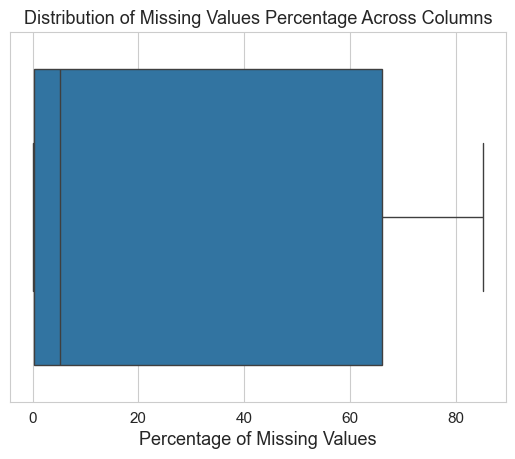

In [34]:
# Pourcentage de valeurs manquantes par colonne
missing_values_percentage = df.isna().mean() * 100
sns.boxplot(x=missing_values_percentage)
plt.title('Distribution of Missing Values Percentage Across Columns')
plt.xlabel('Percentage of Missing Values')
plt.show()

In [35]:
df_filtered = pfc.filter_missing_val(df, 50)
df_filtered.shape

(356255, 545)

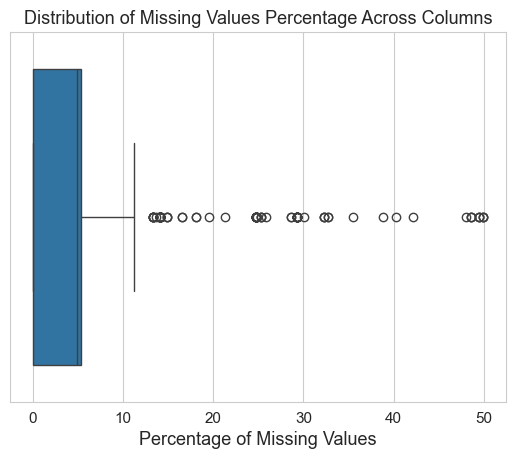

In [36]:
# Calculer le pourcentage de valeurs manquantes pour chaque colonne
missing_values_percentage = df_filtered.isna().mean() * 100

# Créer un boxplot
sns.boxplot(x=missing_values_percentage)

# Ajouter des labels
plt.title('Distribution of Missing Values Percentage Across Columns')
plt.xlabel('Percentage of Missing Values')

# Afficher le plot
plt.show()


## Type of variables

In [37]:
# Replace special characters 
df_filtered.columns = df_filtered.columns.str.replace(r'[^\w]', '_', regex=True)

# Convert all columns to numeric
for col in df_filtered.columns:
    df_filtered[col] = pd.to_numeric(df_filtered[col], errors='coerce')

# Features selection

## Feature importance with all features

In [58]:
feature_importance_df = pfc.kfold_lightgbm(df_filtered, num_folds= 7, stratified= False, debug=False)

Starting LightGBM. Train shape: (307511, 545)
Fold 1 AUC : 0.775588
Fold 2 AUC : 0.778010
Fold 3 AUC : 0.772842
Fold 4 AUC : 0.771416
Fold 5 AUC : 0.770523
Fold 6 AUC : 0.776741
Fold 7 AUC : 0.770626
Full AUC score: 0.773700


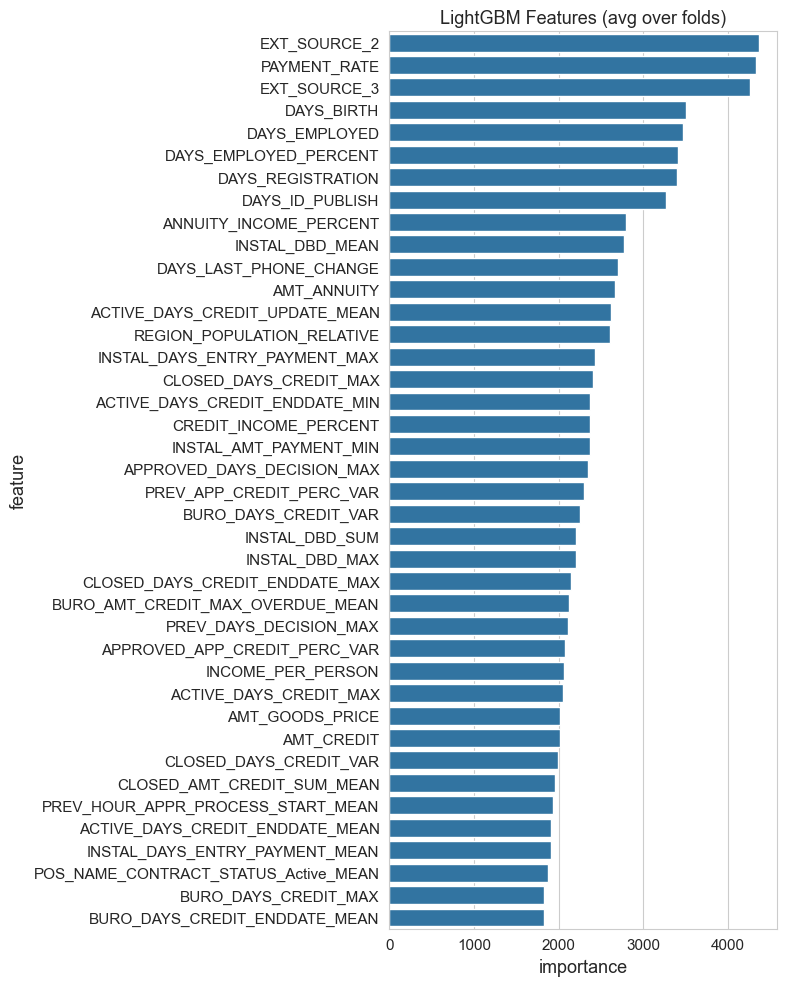

In [59]:
# Display feature importance
pfc.display_importances(feature_importance_df)

## Correlation filter

In [60]:
# Identify best features
best_feature_df = (feature_importance_df[["feature", "importance"]]
                        .groupby("feature")
                        .mean()
                        .sort_values(by="importance", ascending=False)[:100])

best_cols = list(best_feature_df.index)

In [61]:
# Correlation between features
correlations = df_filtered[best_cols].corr()

In [62]:
# Keep only the upper part of the triangle matrix and convert to show as pairs
mask = np.triu(np.ones_like(correlations, dtype=bool))
correlations_pairs = correlations.mask(mask).stack().reset_index()

# Rename columns and sort values
correlations_pairs.columns = ['Feature 1', 'Feature 2', 'Correlation']
correlations_pairs = correlations_pairs.sort_values('Correlation', ascending=False)

In [63]:
# Extract highly correlated pairs
high_corr_pairs = correlations_pairs[correlations_pairs['Correlation'].abs() > 0.7]

# Create a list to store features to remove
features_to_remove = []

# Loop through the correlated pairs
for index, row in high_corr_pairs.iterrows():
    feature_1 = row['Feature 1']
    feature_2 = row['Feature 2']
    
    # Retrieve the importances of both features
    importance_1 = best_feature_df.loc[feature_1, 'importance']
    importance_2 = best_feature_df.loc[feature_2, 'importance']
    
    # Compare importances and add the less important feature to the list of features to remove
    if importance_1 < importance_2:
        features_to_remove.append(feature_1)
    else:
        features_to_remove.append(feature_2)

# Remove the features to delete from best_cols
best_cols = [col for col in best_cols if col not in features_to_remove]


In [64]:
best_cols.append('TARGET') 

## Feature importance with selected features

In [65]:
df_feat_select = df_filtered[best_cols]

In [66]:
df_feat_select.shape

(356255, 51)

In [67]:
feature_importance_df = pfc.kfold_lightgbm(df_feat_select, num_folds= 7, stratified= False, debug=False)

Starting LightGBM. Train shape: (307511, 51)
Fold 1 AUC : 0.760935
Fold 2 AUC : 0.758936
Fold 3 AUC : 0.761040
Fold 4 AUC : 0.756614
Fold 5 AUC : 0.754435
Fold 6 AUC : 0.759578
Fold 7 AUC : 0.757016
Full AUC score: 0.758382


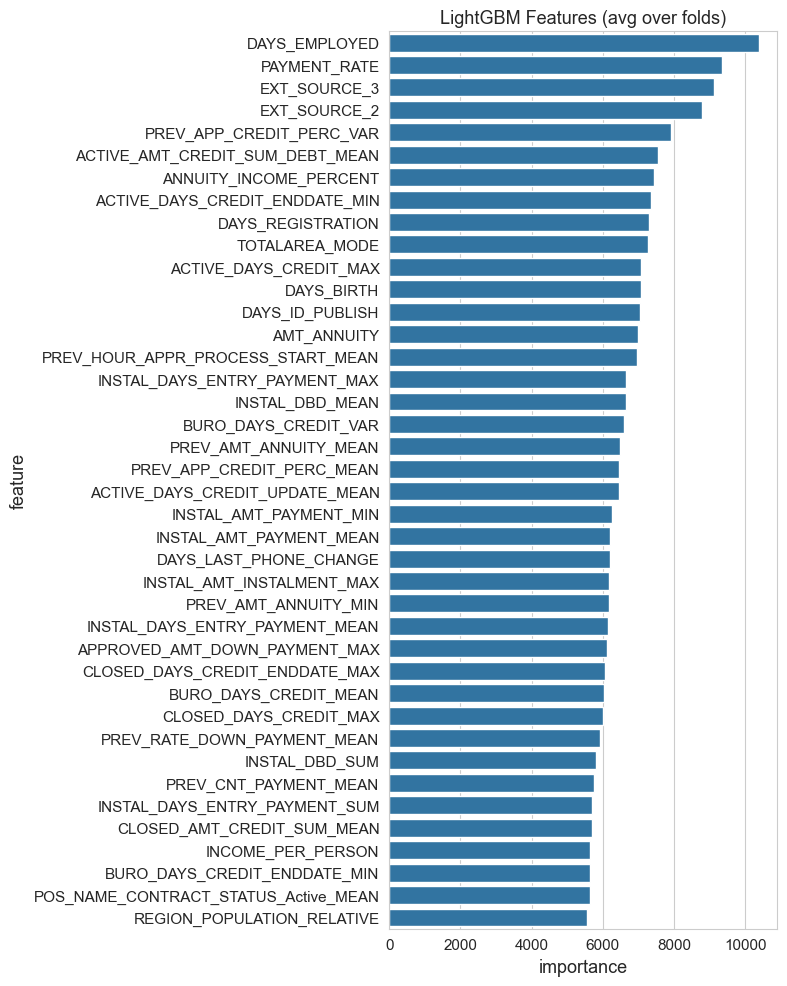

In [68]:
# Display feature importance
pfc.display_importances(feature_importance_df)

La réduction du nombre de features n'a pas détérioré les résultats.

# Missing values

In [87]:
nb_inf = np.isinf(df_feat_select).sum()
nb_inf[nb_inf>0]

PREV_APP_CREDIT_PERC_MEAN    1
dtype: int64

In [88]:
# Remplacer les valeurs infinies par des NaN
df_feat_select.replace([np.inf, -np.inf], np.nan, inplace=True)

In [89]:
nb_na = df_feat_select.isna().mean()
nb_na[nb_na>0]

EXT_SOURCE_2                               0.001875
PAYMENT_RATE                               0.000101
EXT_SOURCE_3                               0.195458
DAYS_EMPLOYED                              0.181466
ANNUITY_INCOME_PERCENT                     0.000101
INSTAL_DBD_MEAN                            0.046787
DAYS_LAST_PHONE_CHANGE                     0.000003
AMT_ANNUITY                                0.000101
ACTIVE_DAYS_CREDIT_UPDATE_MEAN             0.293161
INSTAL_DAYS_ENTRY_PAYMENT_MAX              0.046812
CLOSED_DAYS_CREDIT_MAX                     0.247940
ACTIVE_DAYS_CREDIT_ENDDATE_MIN             0.322547
INSTAL_AMT_PAYMENT_MIN                     0.046812
PREV_APP_CREDIT_PERC_VAR                   0.248232
BURO_DAYS_CREDIT_VAR                       0.258141
INSTAL_DBD_SUM                             0.046787
INSTAL_DBD_MAX                             0.046787
CLOSED_DAYS_CREDIT_ENDDATE_MAX             0.252861
BURO_AMT_CREDIT_MAX_OVERDUE_MEAN           0.402195
INCOME_PER_P

In [90]:
# Save dataframe
df_feat_select.to_pickle('df_final.pkl')
